In [62]:
##############################                 Decision Tree             ############################

In [107]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
data=pd.read_csv("C:/Users/ARUL MURUGAN/RK ML/project/WineQT.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [109]:
print ("Dataset Length: ", len(data))
print ("Dataset Shape: ", data.shape)
      
    # Printing the dataset obseravtions
print ("Dataset:\n ",data.head(10))

Dataset Length:  1143
Dataset Shape:  (1143, 13)
Dataset:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            6.7              0.58         0.08             1.8      0.097   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0      

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

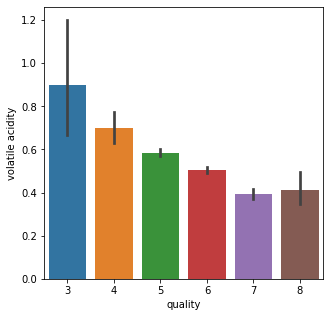

In [110]:
####    Graphical representation
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data = data)

In [111]:
X=data.drop('quality',axis=1) # feature scaling

In [112]:
y=data['quality'].apply(lambda y_value:1 if y_value>=7 else 0) #target converting value to 0 and 1

In [113]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [115]:
# to perform training with giniIndex.

# Creating the classifier object
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 10,max_depth=3, min_samples_leaf=5)
  
# Performing training
clf_gini.fit(X_train, y_train)
    

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=10)

In [116]:
#to perform training with entropy.
# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 10,max_depth = 3, min_samples_leaf = 5)
# Performing training
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=10)

In [117]:
ypregini=clf_gini.predict(X_test)
ypreentropy=clf_entropy.predict(X_test)


In [118]:
ypregini

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [119]:
ypreentropy

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [120]:
# gini
print("   gini                ")
print("Confusion Matrix:\n\n----------------\n ",
confusion_matrix(y_test, ypregini))
print ("Accuracy score: \n-----------------\n",
accuracy_score(y_test,ypregini)*100)
print("f1 score Report : \n-------------------\n",
classification_report(y_test, ypregini))

   gini                
Confusion Matrix:

----------------
  [[183   5]
 [ 23  18]]
Accuracy score: 
-----------------
 87.77292576419214
f1 score Report : 
-------------------
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       188
           1       0.78      0.44      0.56        41

    accuracy                           0.88       229
   macro avg       0.84      0.71      0.75       229
weighted avg       0.87      0.88      0.86       229



In [121]:
# entropy
print("   entropy                ")
print("Confusion Matrix:\n\n----------------\n ",
confusion_matrix(y_test, ypreentropy))
print ("Accuracy score: \n-----------------\n",
accuracy_score(y_test,ypreentropy)*100)
print("f1 score Report : \n-------------------\n",
classification_report(y_test, ypreentropy))

   entropy                
Confusion Matrix:

----------------
  [[180   8]
 [ 30  11]]
Accuracy score: 
-----------------
 83.4061135371179
f1 score Report : 
-------------------
               precision    recall  f1-score   support

           0       0.86      0.96      0.90       188
           1       0.58      0.27      0.37        41

    accuracy                           0.83       229
   macro avg       0.72      0.61      0.64       229
weighted avg       0.81      0.83      0.81       229



In [122]:
#######################            Randomforestclassifier   ##################

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
#################              StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [125]:
clfr=RandomForestClassifier(n_estimators=10,criterion='gini')
clfr.fit(X_train,y_train)


RandomForestClassifier(n_estimators=10)

In [126]:
yprer=clfr.predict(X_test)
output=confusion_matrix(y_test,yprer)
print('Confusion matrix output: ')
output

Confusion matrix output: 


array([[184,   4],
       [ 26,  15]], dtype=int64)

In [127]:
output1=classification_report(y_test,yprer)
print('Classification report')
print(output1)

Classification report
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       188
           1       0.79      0.37      0.50        41

    accuracy                           0.87       229
   macro avg       0.83      0.67      0.71       229
weighted avg       0.86      0.87      0.85       229



In [128]:
output2=accuracy_score(y_test,yprer)
print(output2)

0.868995633187773


In [ ]:
# In wine quality dataset  DecisionTreeClassifier as predicted 87%(when using gini) and RandomForestClassifier as predicted
#                                                                                                       86%(when using gini)